In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


## 1. Importing Libraries and Data

In [2]:
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seabor library for interactive visualization
%matplotlib inline



## 2. First Glance at Data

In [3]:
#first glance
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [5]:
#Data description
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# 3. Data Cleaning

****As we see in the above section (2.First glance at Data):****

* there aren't any missing values in the dataset
* all dtypes seem to be ideal



In [6]:
# but lets check if there are any Duplicate values
df.duplicated().any()

False

In [7]:
''' it is crucial to check if our output is balanced. 
in some ML algorithms, unbalanced output is problematic'''

df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

**Observation**

* There are no duplicates
* The output (Class) is well balanced

***Conclusion***

* The dataset seems to be clean. This means we are at least a few steps ahead in the data cleansing proces It looks like we don't need to do any more cleaning in this step.


# 4. EDA

## 4.1 Correlation Heatmap

/tmp/ipykernel_20/48137226.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


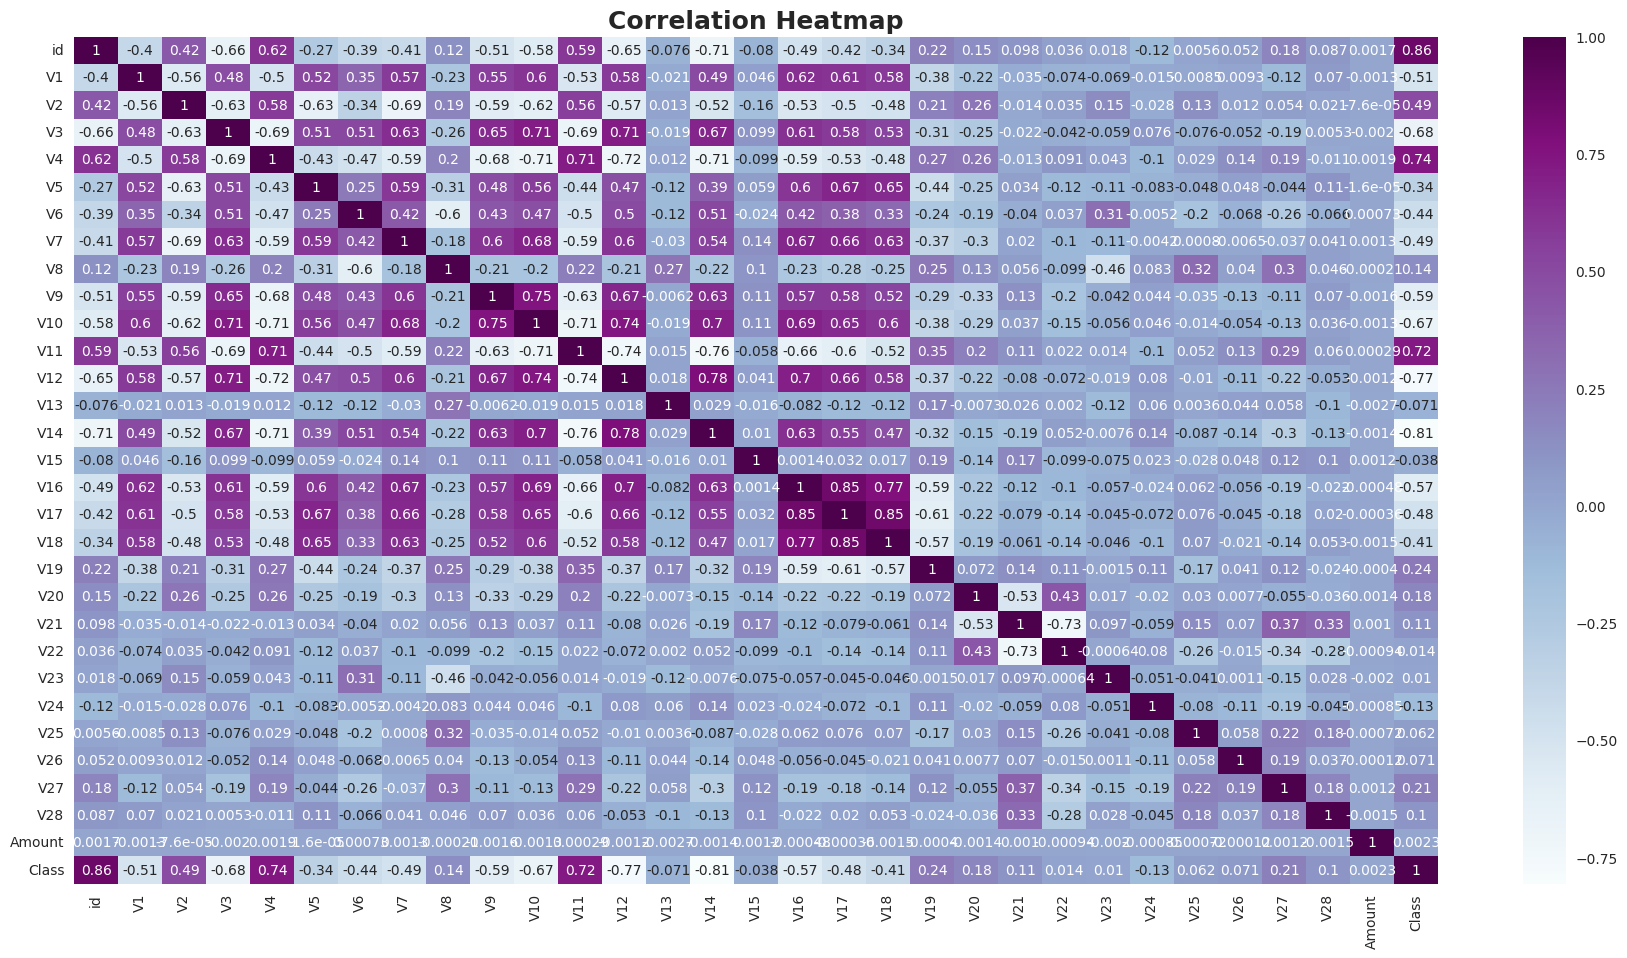

In [8]:
plt.style.use("seaborn")

plt.rcParams['figure.figsize']= (22,11)

title = "Correlation Heatmap"

plt.title(title,fontsize=18, weight= 'bold')

sns.heatmap(df.corr(), cmap="BuPu", annot=True)

plt.show()

**Observation**

* the most significant *strong positive correlations* are between **V16 - V17 - V18** and between **V9 - V10**
* the most significant *strong negetive correlations* are between **V4 - V14** // **V4 - V12** // **V4 - V10** // **V10 - V11** // **V11 - V14** // **V11 - V12** // **V21 - V22**
* there is clear lack of h-positive correlations in the range of **V19 to V28**
* there are several moderate to semi-strong positive/negetive correlations in the range of **V1 to V18**

## 4.2 'Amount' distributaion

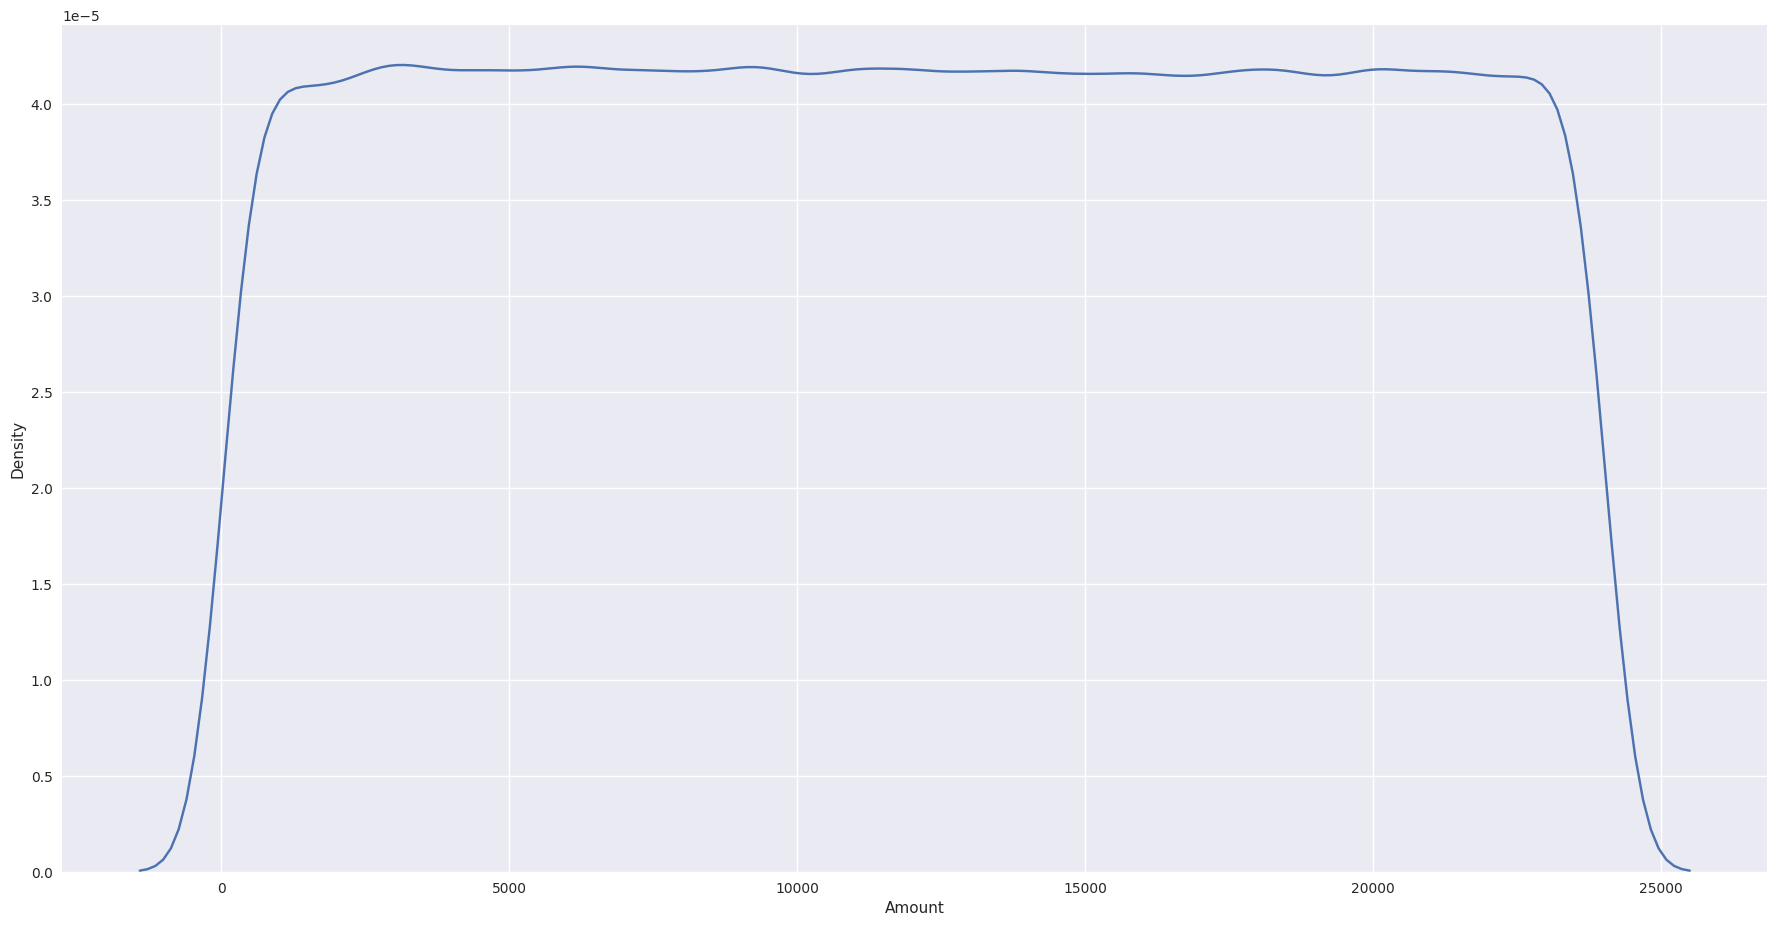

In [9]:
sns.kdeplot(data=df['Amount'])
plt.show()

**Observation**

The 'Amount' is normaly distributed

# 5. Data Prepration

## 5.1 Defining X and target values (Y)

In [10]:
# devide our data set to X and Y

x= df.drop(['id', 'Class'], axis= 1)
y= df['Class']

In [11]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97


In [12]:
y.shape

(568630,)

## 5.2 Feature Scaling

In [13]:
# our numerical attributes 'Amount' has a very different scales
# I use StandardScaler to do the job

from sklearn.preprocessing import StandardScaler

In [14]:
stn_scaler = StandardScaler()

x_scaled = stn_scaler.fit_transform(x)

In [15]:
# our x is now an array. to have a pn dataframe:

X = pd.DataFrame(x_scaled,columns=x.columns)

In [16]:
# as shown below, 'Amount' is scaled
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285


## 5.3 Split the data set

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(454904, 29)
(113726, 29)
(454904,)
(113726,)


# 6 ML Models

## 6.1 Logestic Regression

In [20]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

In [21]:
lin_reg= LogisticRegression()
lin_reg.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_pred = lin_reg.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     56750
           1       0.98      0.95      0.96     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



## 6.2 Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier 

In [25]:
dec_tree= DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dec_tree.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



## 6.3 Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rand_forest= DecisionTreeClassifier()
rand_forest.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = rand_forest.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



## 6.4 Nearest Neighbor

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred = knn.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



**Observations**

* Logestic Regression model shows an accuracy of 0.97
* Decision Tree model shows an accuracy of 1.0
* Random Forest model shows an accuracy of 1.0
* Nearest Neighbor model shows an accuracy of 1.0


# 7 Neural Network model

In [36]:
import tensorflow as tf

In [37]:
# it is a good idea to demonstrate our 'Loss' and 'Accuracy' on a side by side plot for every itteration:

def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(history.history['loss'], label='loss') 
    ax1.plot(history.history['val_loss'], label='val_loss') 
    ax1.set_xlabel('Epoch') 
    ax1.set_ylabel('Binary crossentropy') 
    ax1.grid(True) 
    
    ax2.plot(history.history['accuracy'], label='accuracy') 
    ax2.plot(history.history['val_accuracy'], label='val _accuracy') 
    ax2.set_xlabel('Epoch') 
    ax2.set_ylabel('Accuracy') 
    ax2.grid(True) 
    
    plt.show ()

In [38]:
# because I want to compare different hyperparameters, I def a function for our NN model

def train_model(x_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(29,)),
        tf.keras.layers.Dropout(dropout_prob), # to avoid overfitting
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob), # to avoid overfitting
        tf.keras.layers.Dense(1, activation='sigmoid') 
    ])

    nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate), loss= 'binary_crossentropy',
                    metrics=['accuracy'])
    
    history= nn_model.fit(
    x_train, y_train, epochs= epochs, batch_size= batch_size, validation_split= 0.2, verbose=0
    )
                     
    return nn_model, history

32 nodes, dropout 0, learnig rate 0.01, batch size 300


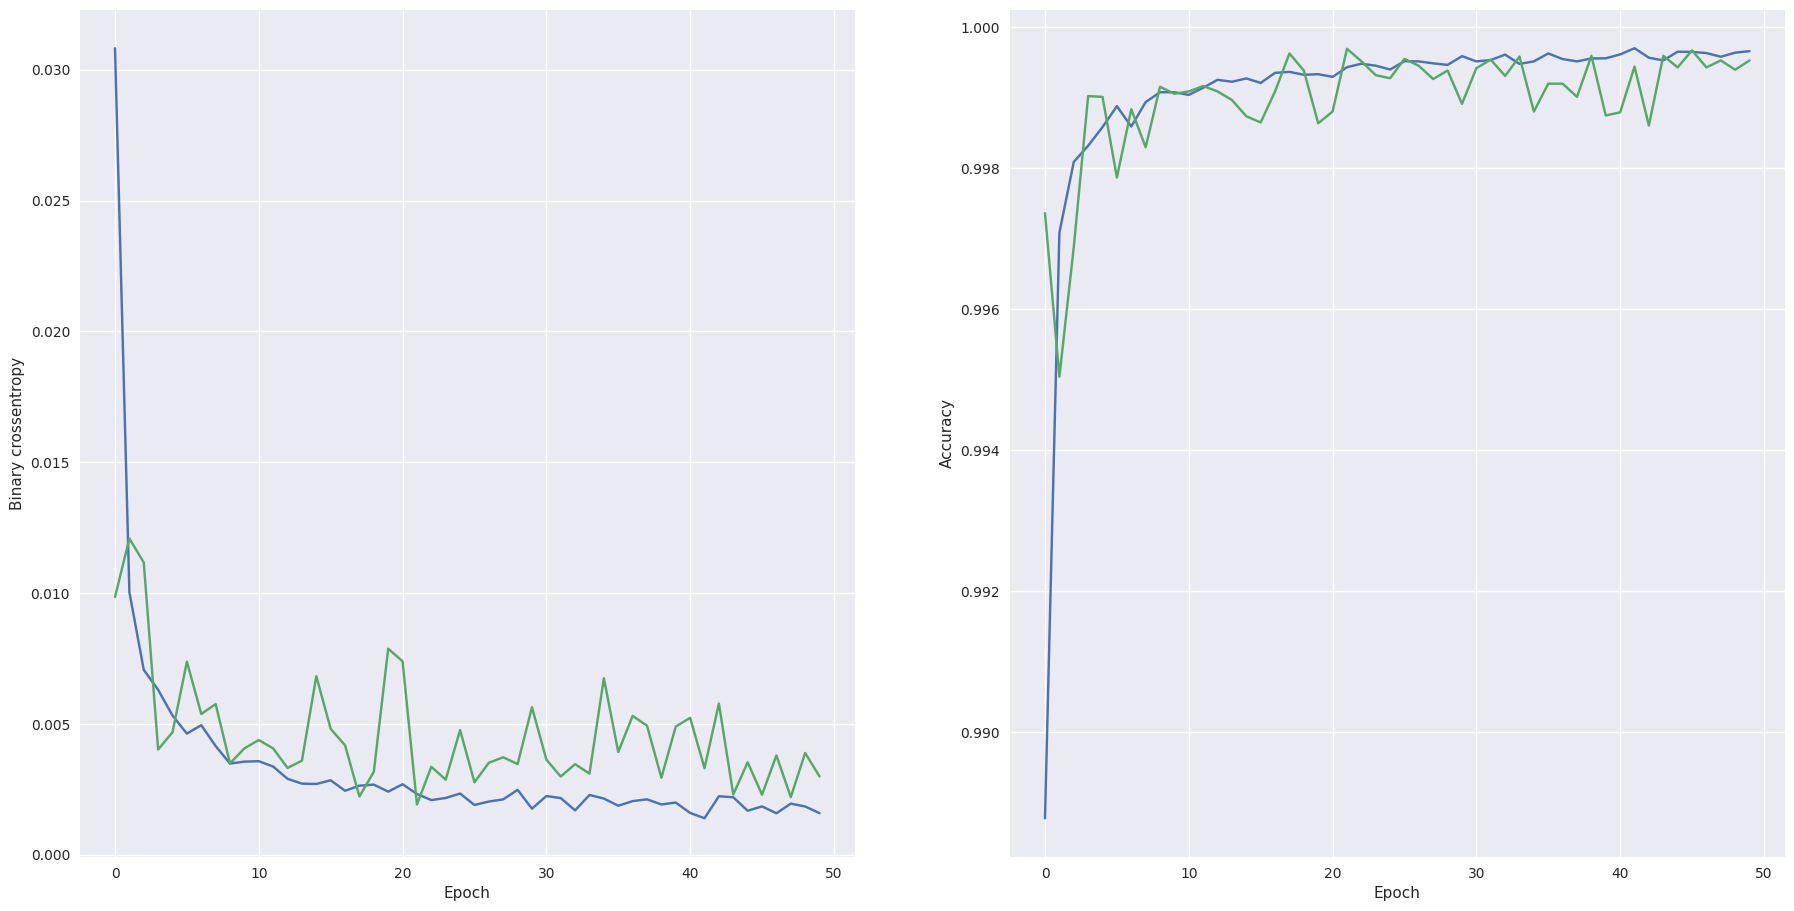

32 nodes, dropout 0, learnig rate 0.01, batch size 500


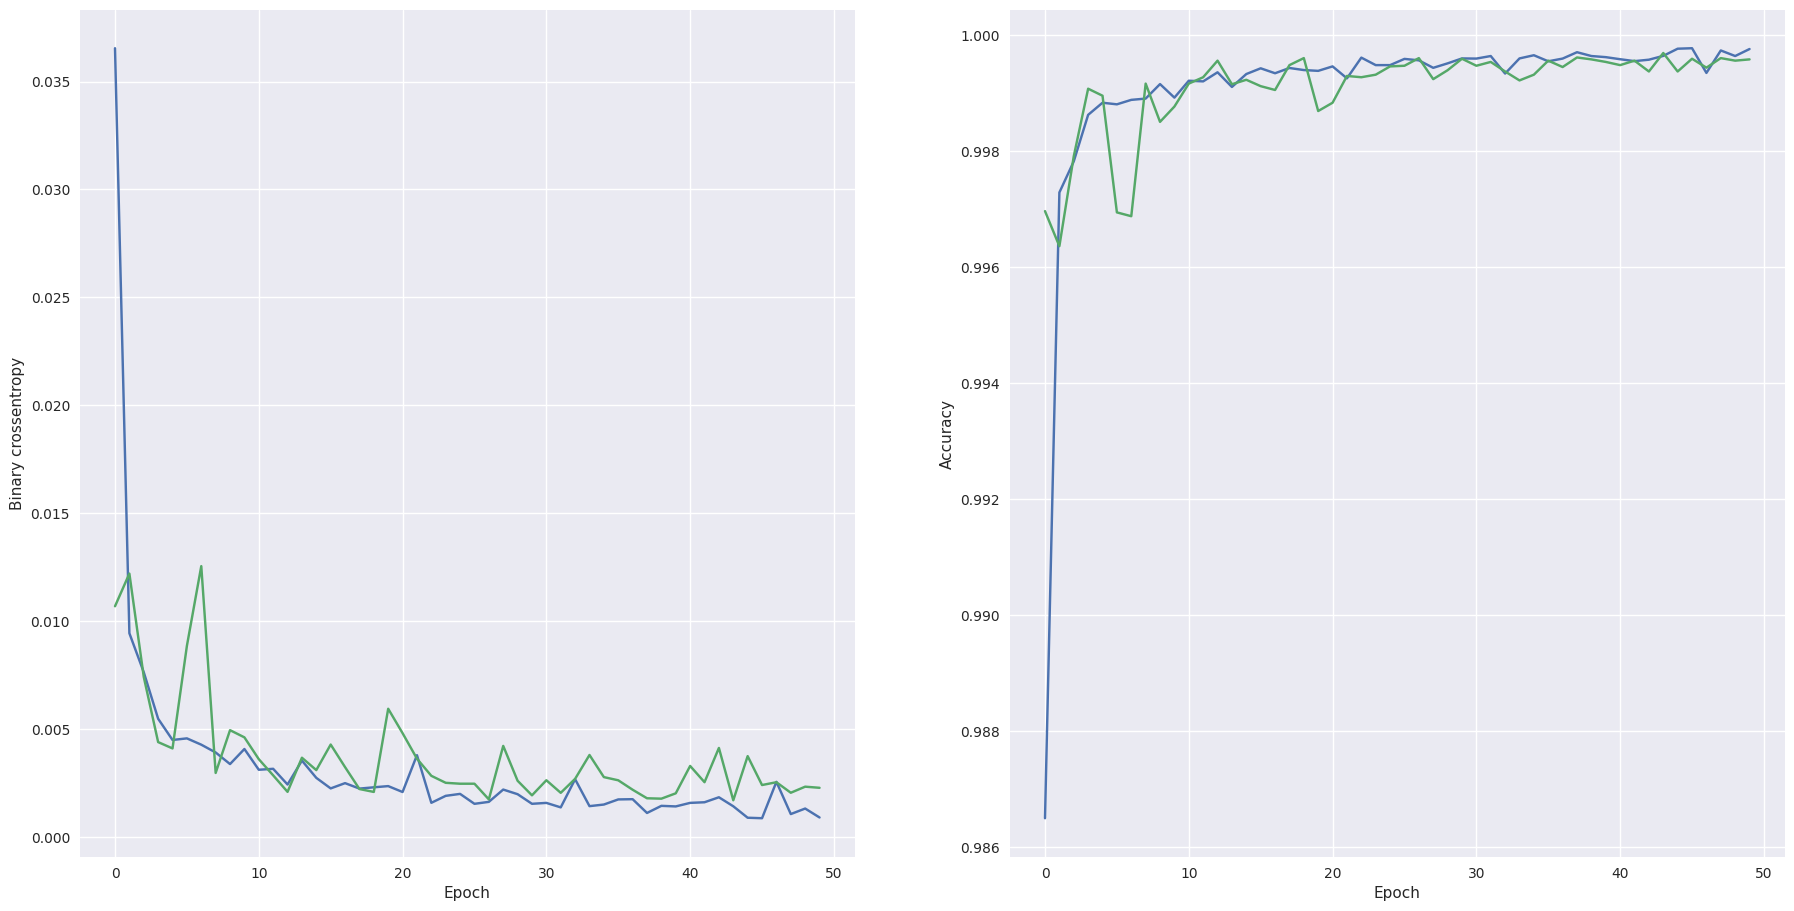

32 nodes, dropout 0, learnig rate 0.001, batch size 300


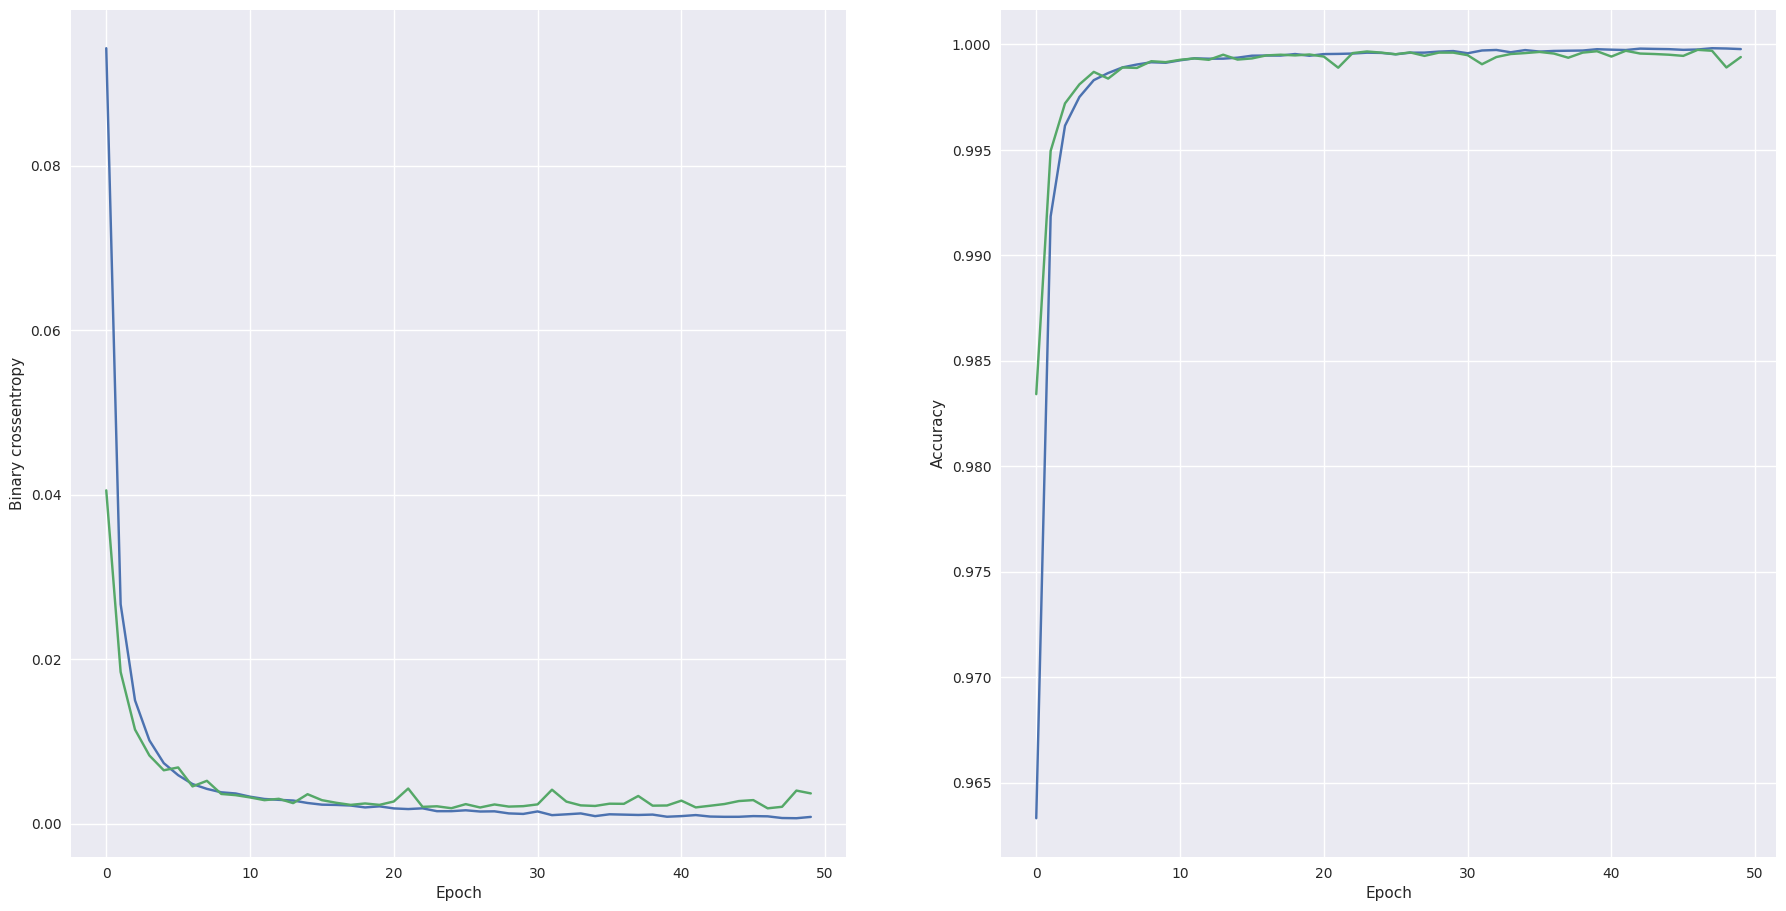

32 nodes, dropout 0, learnig rate 0.001, batch size 500


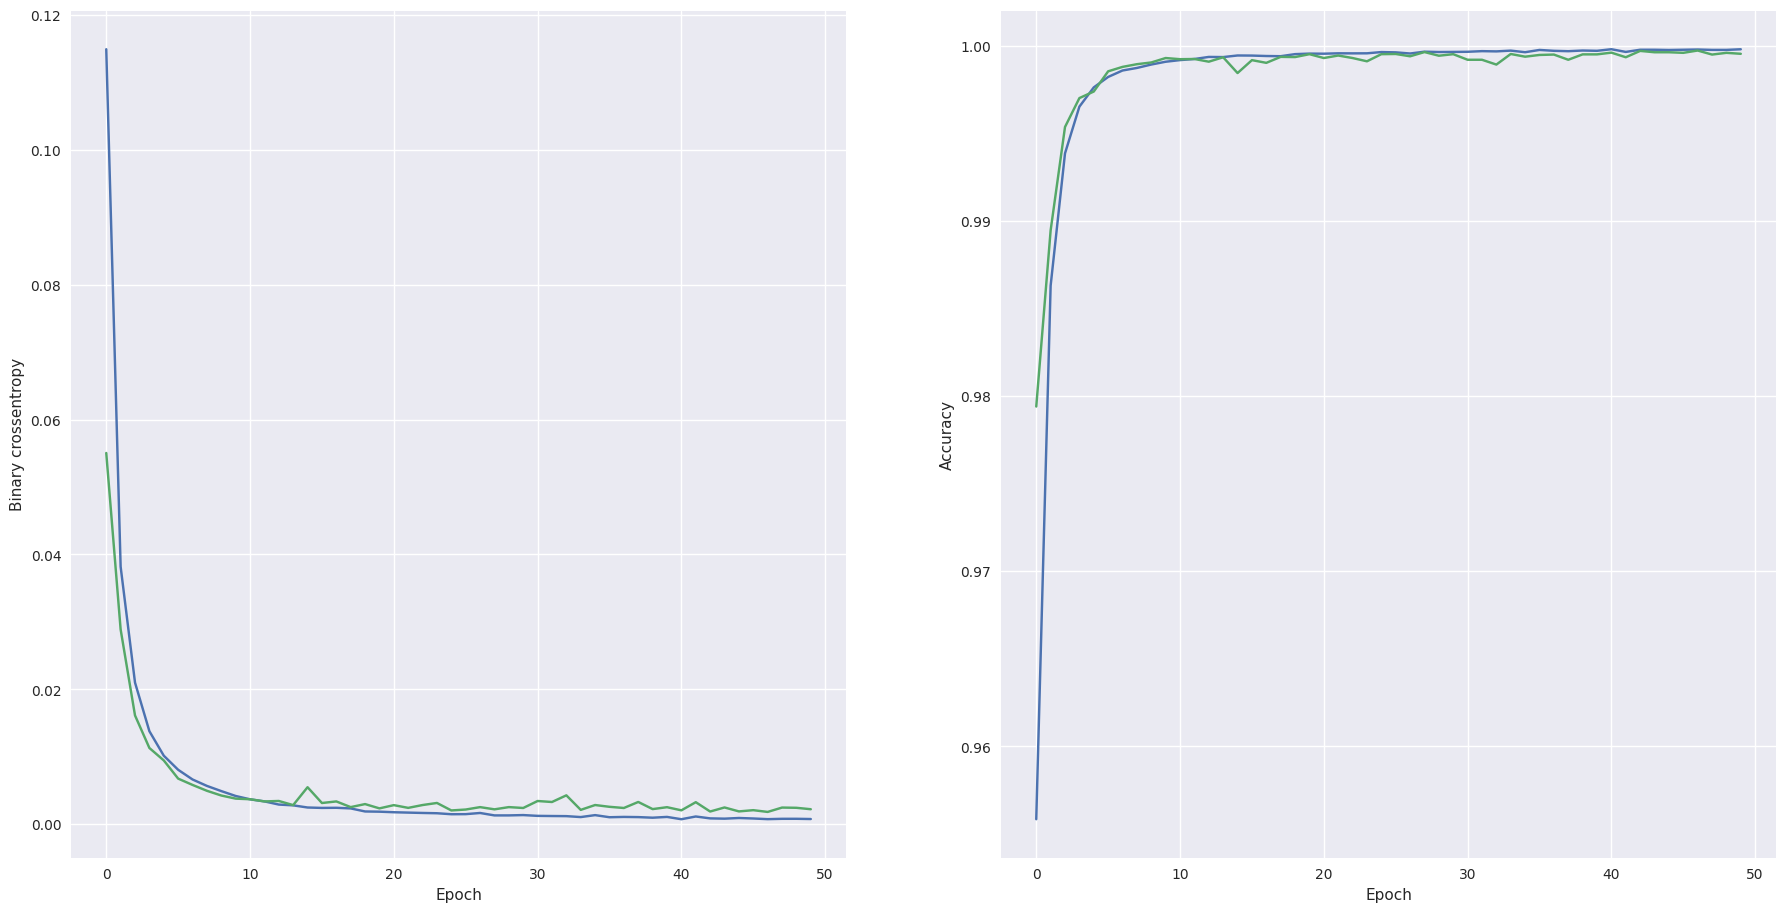

32 nodes, dropout 0.2, learnig rate 0.01, batch size 300


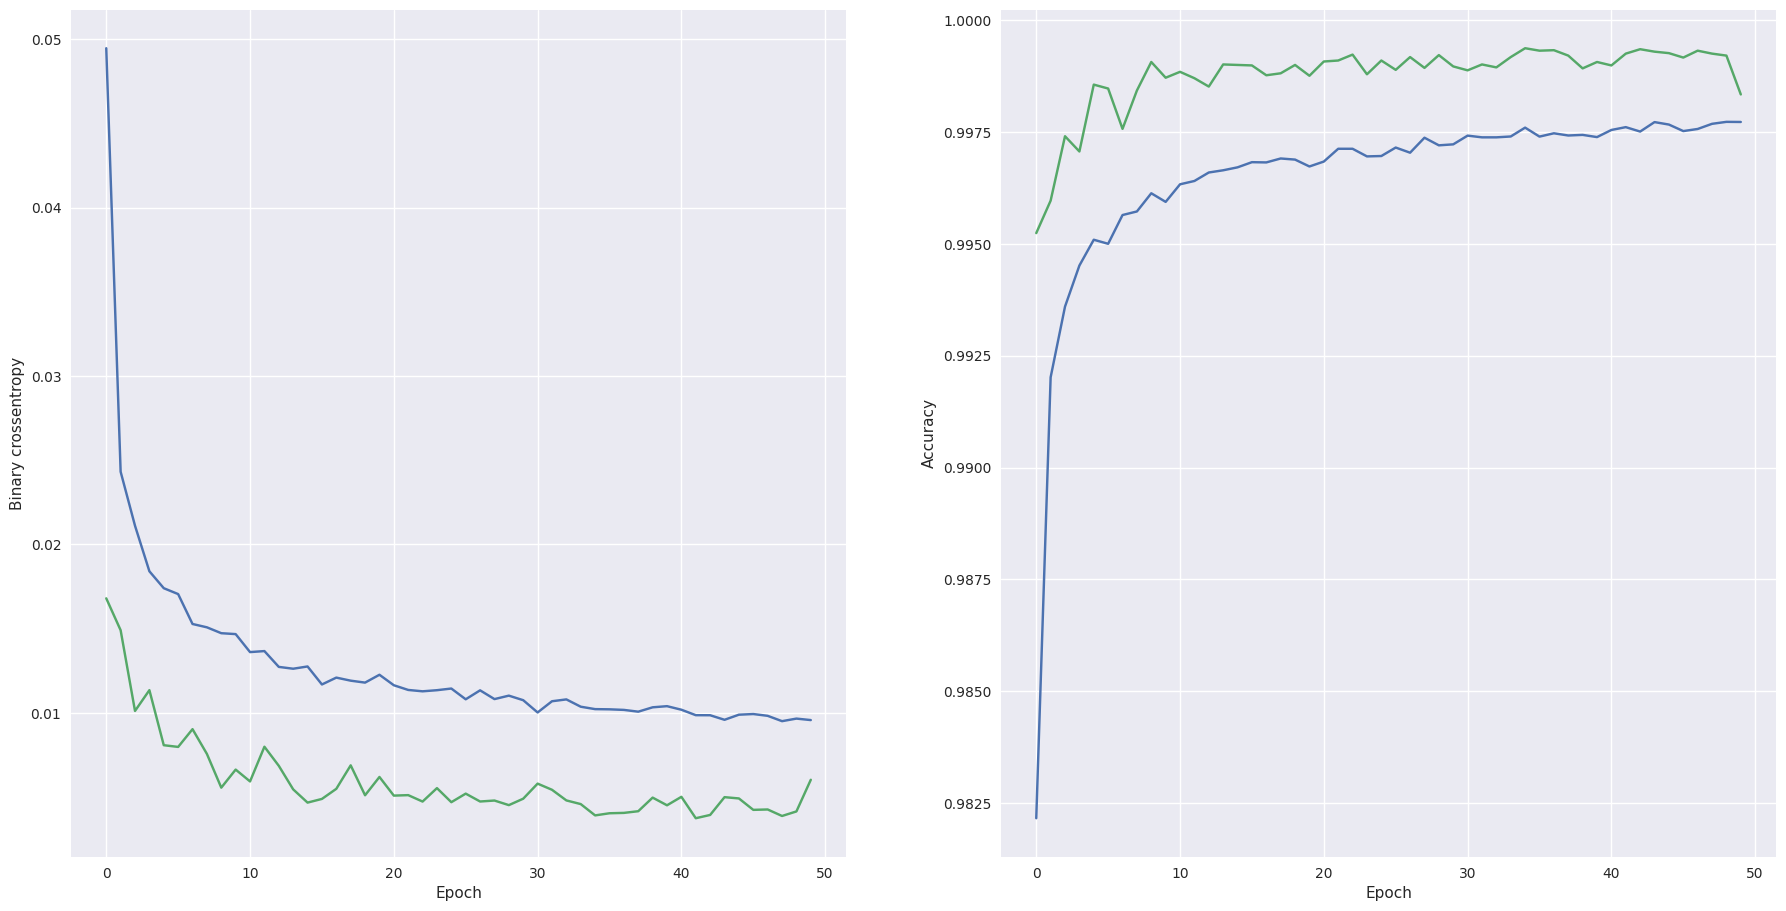

32 nodes, dropout 0.2, learnig rate 0.01, batch size 500


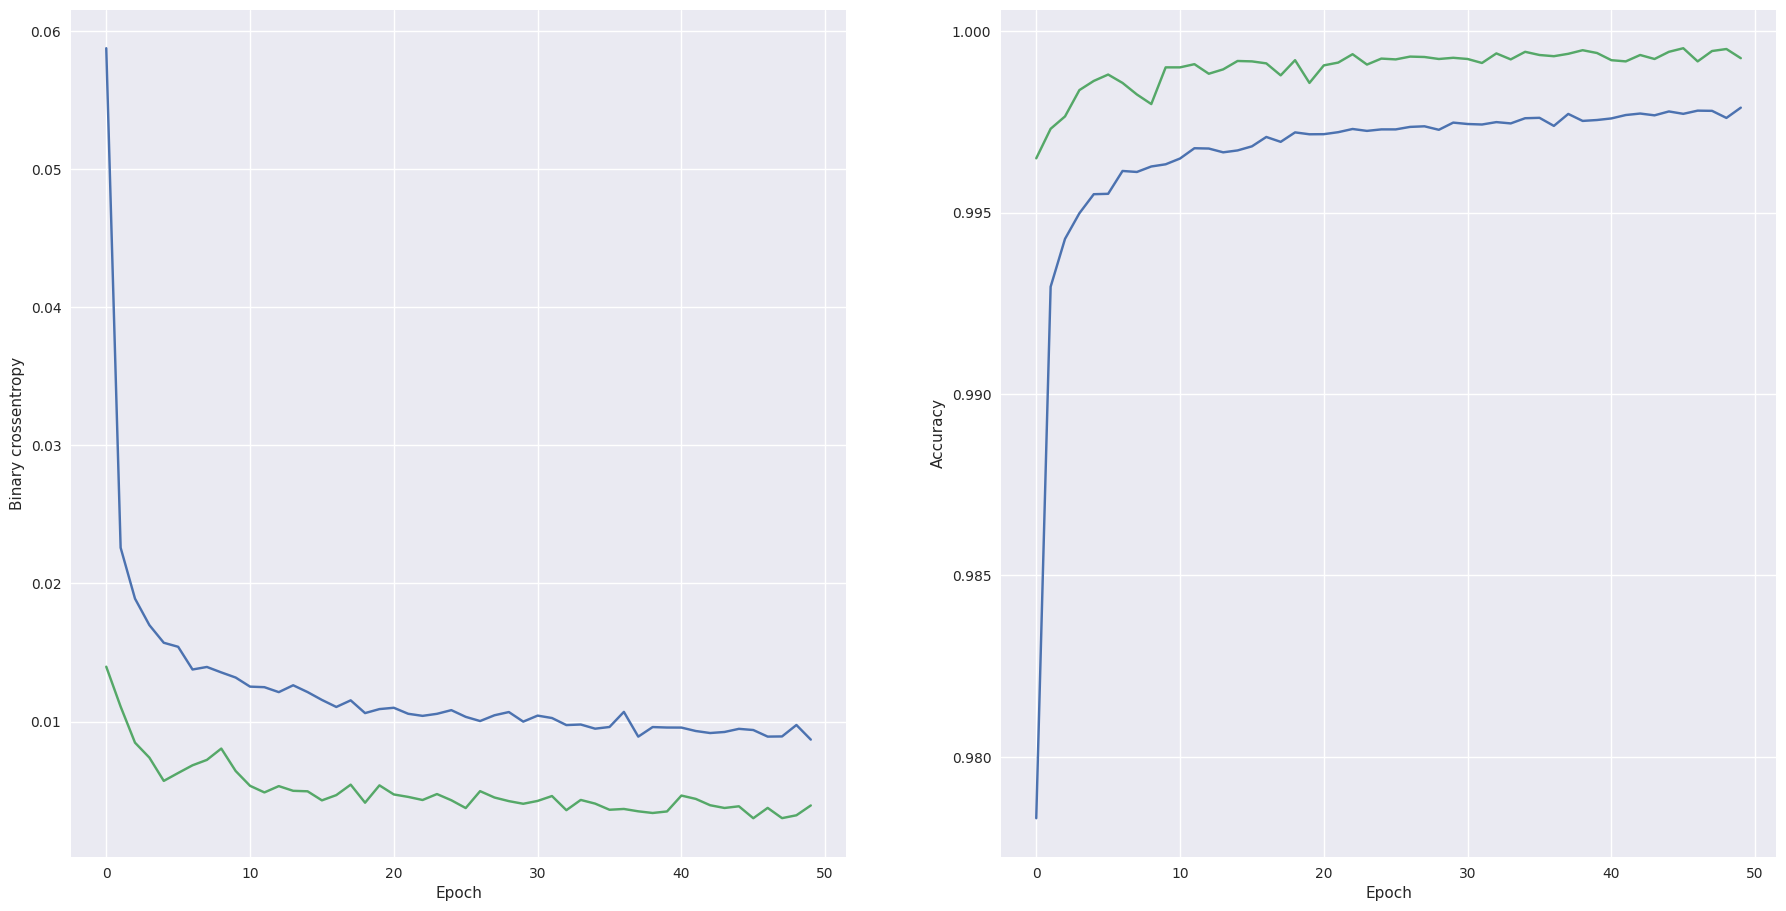

32 nodes, dropout 0.2, learnig rate 0.001, batch size 300


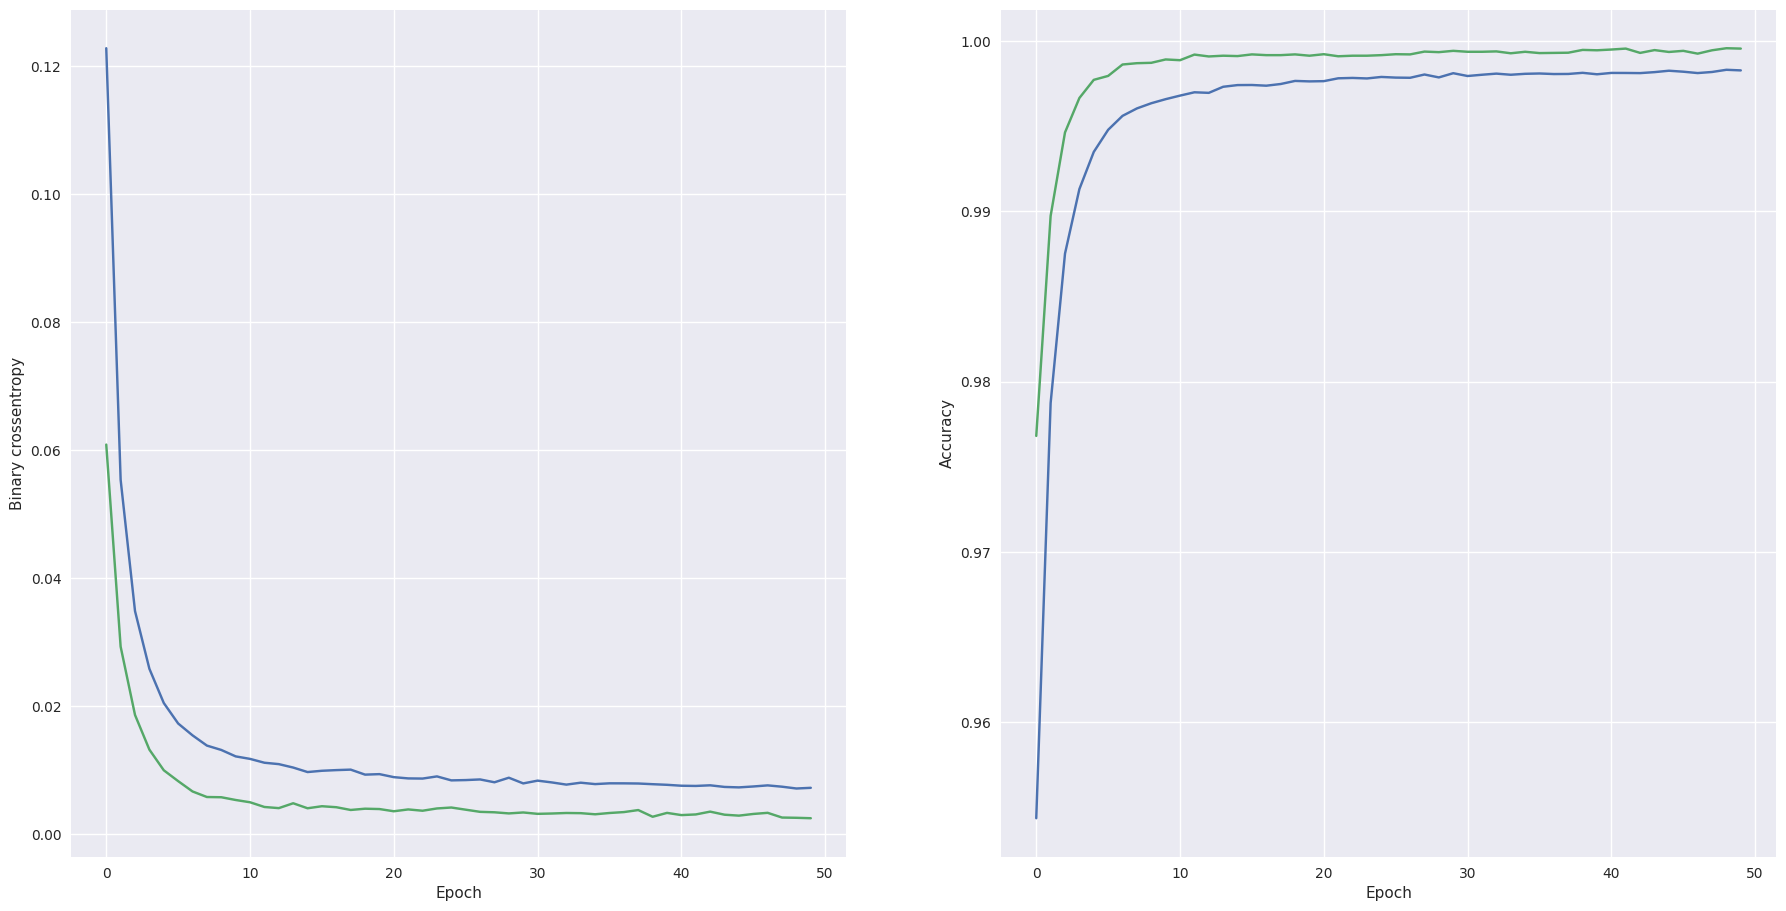

32 nodes, dropout 0.2, learnig rate 0.001, batch size 500


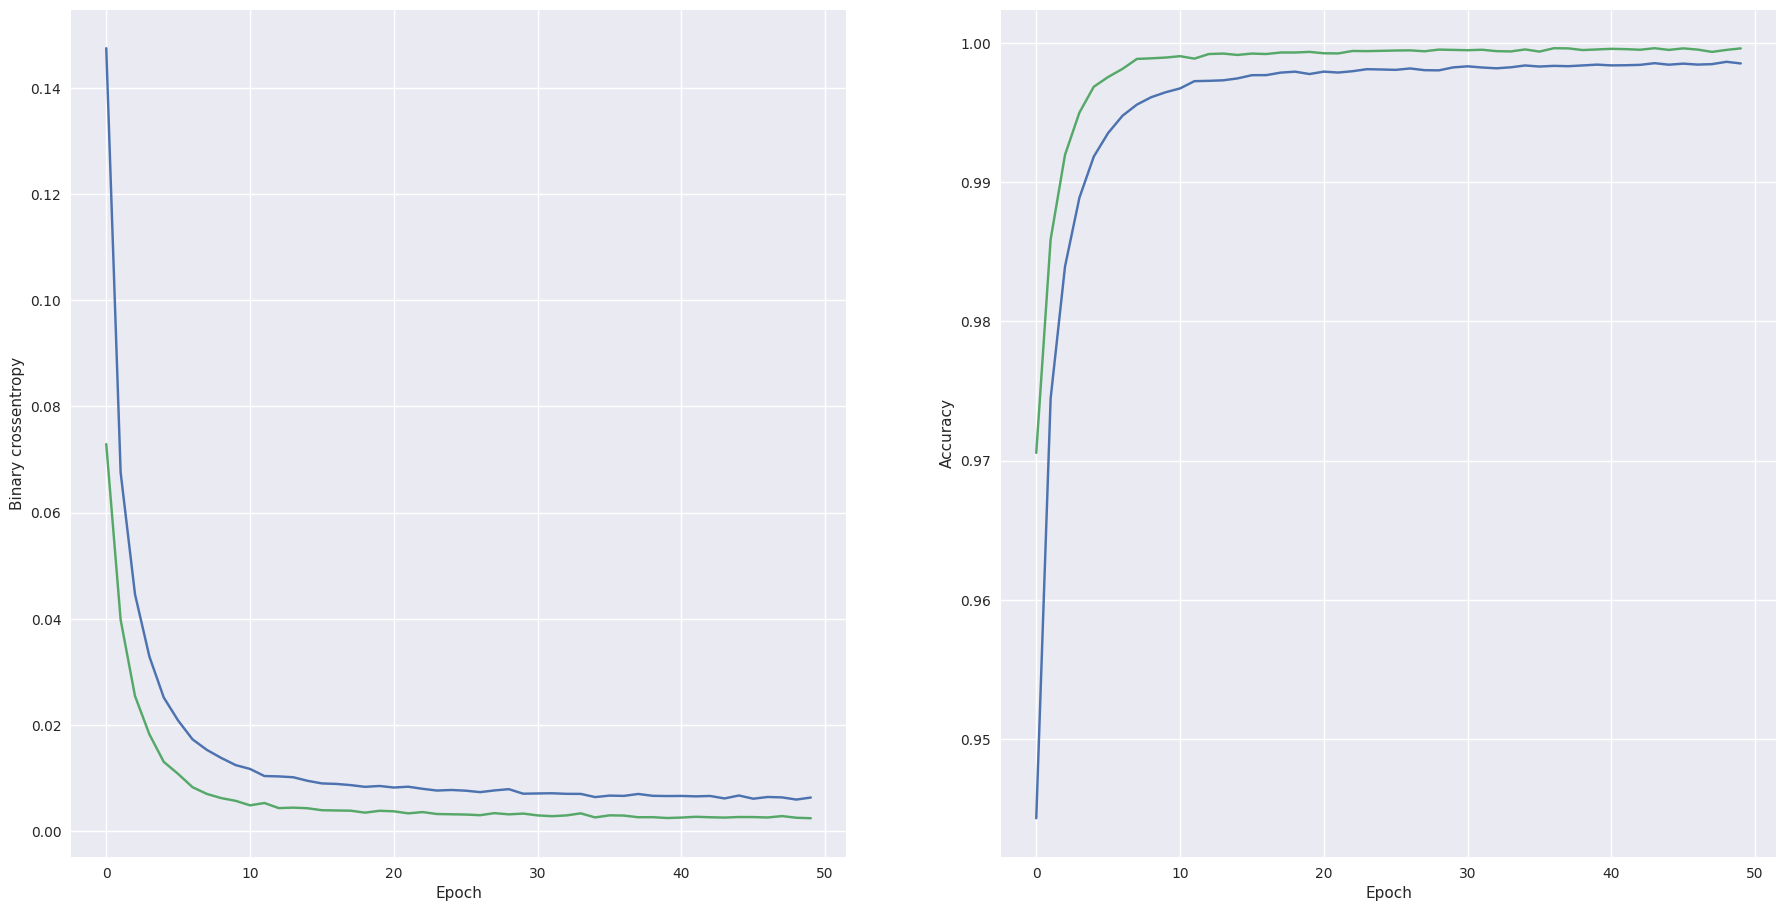

64 nodes, dropout 0, learnig rate 0.01, batch size 300


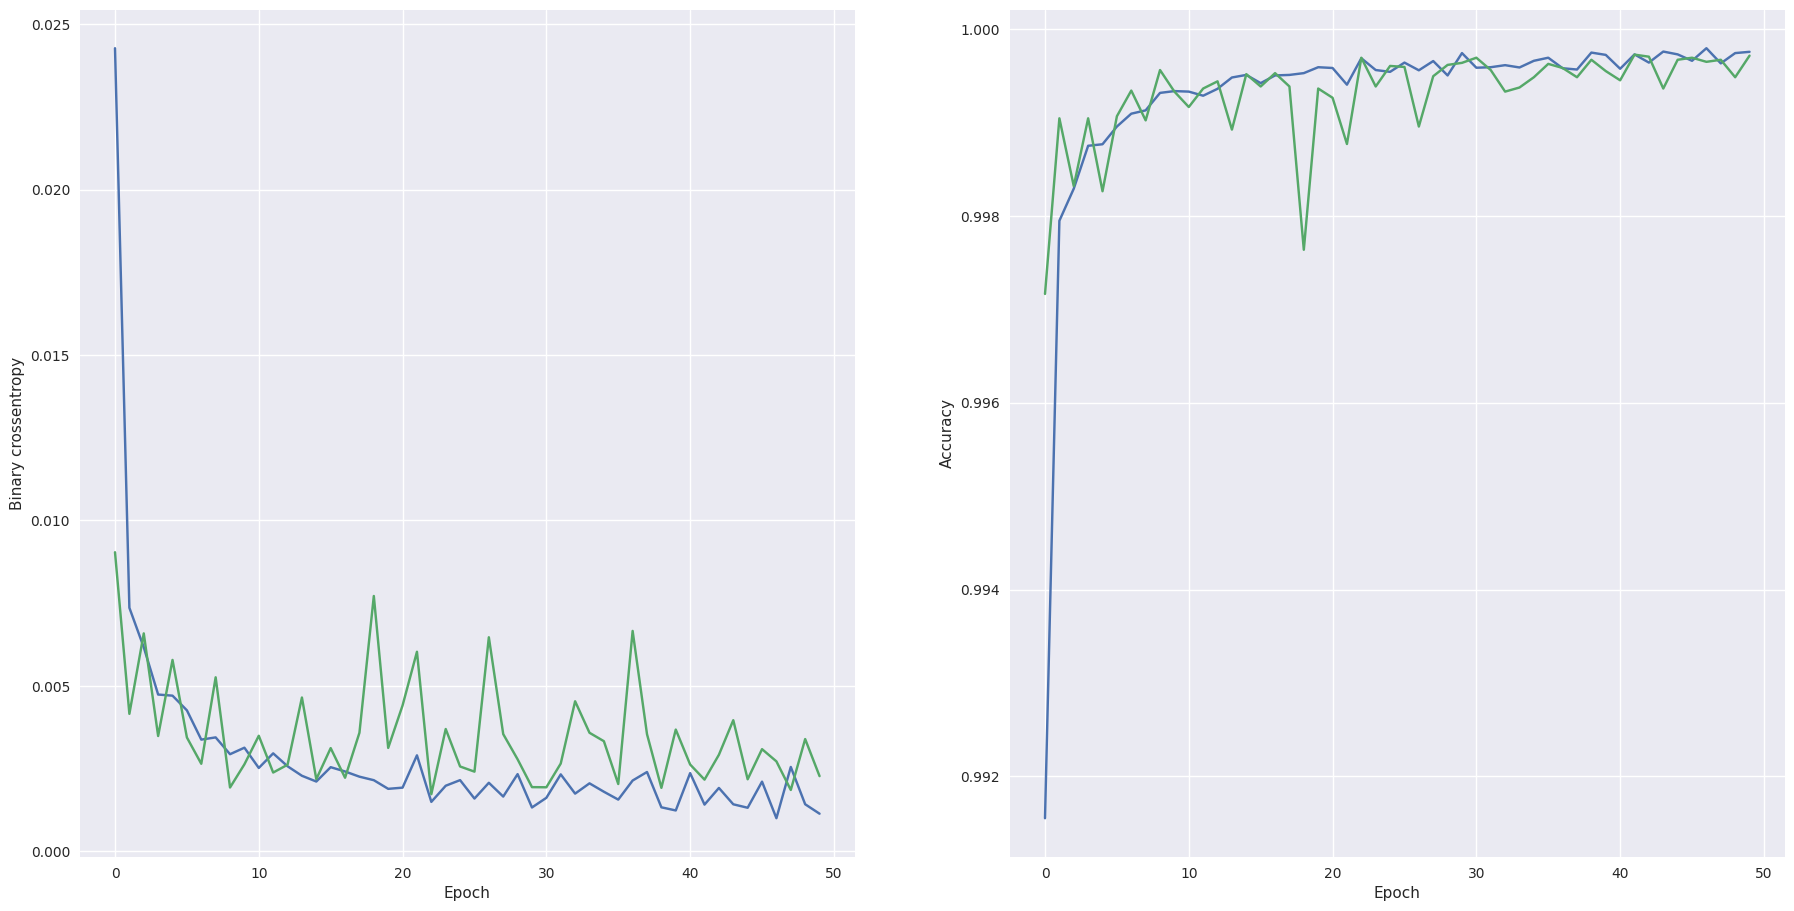

64 nodes, dropout 0, learnig rate 0.01, batch size 500


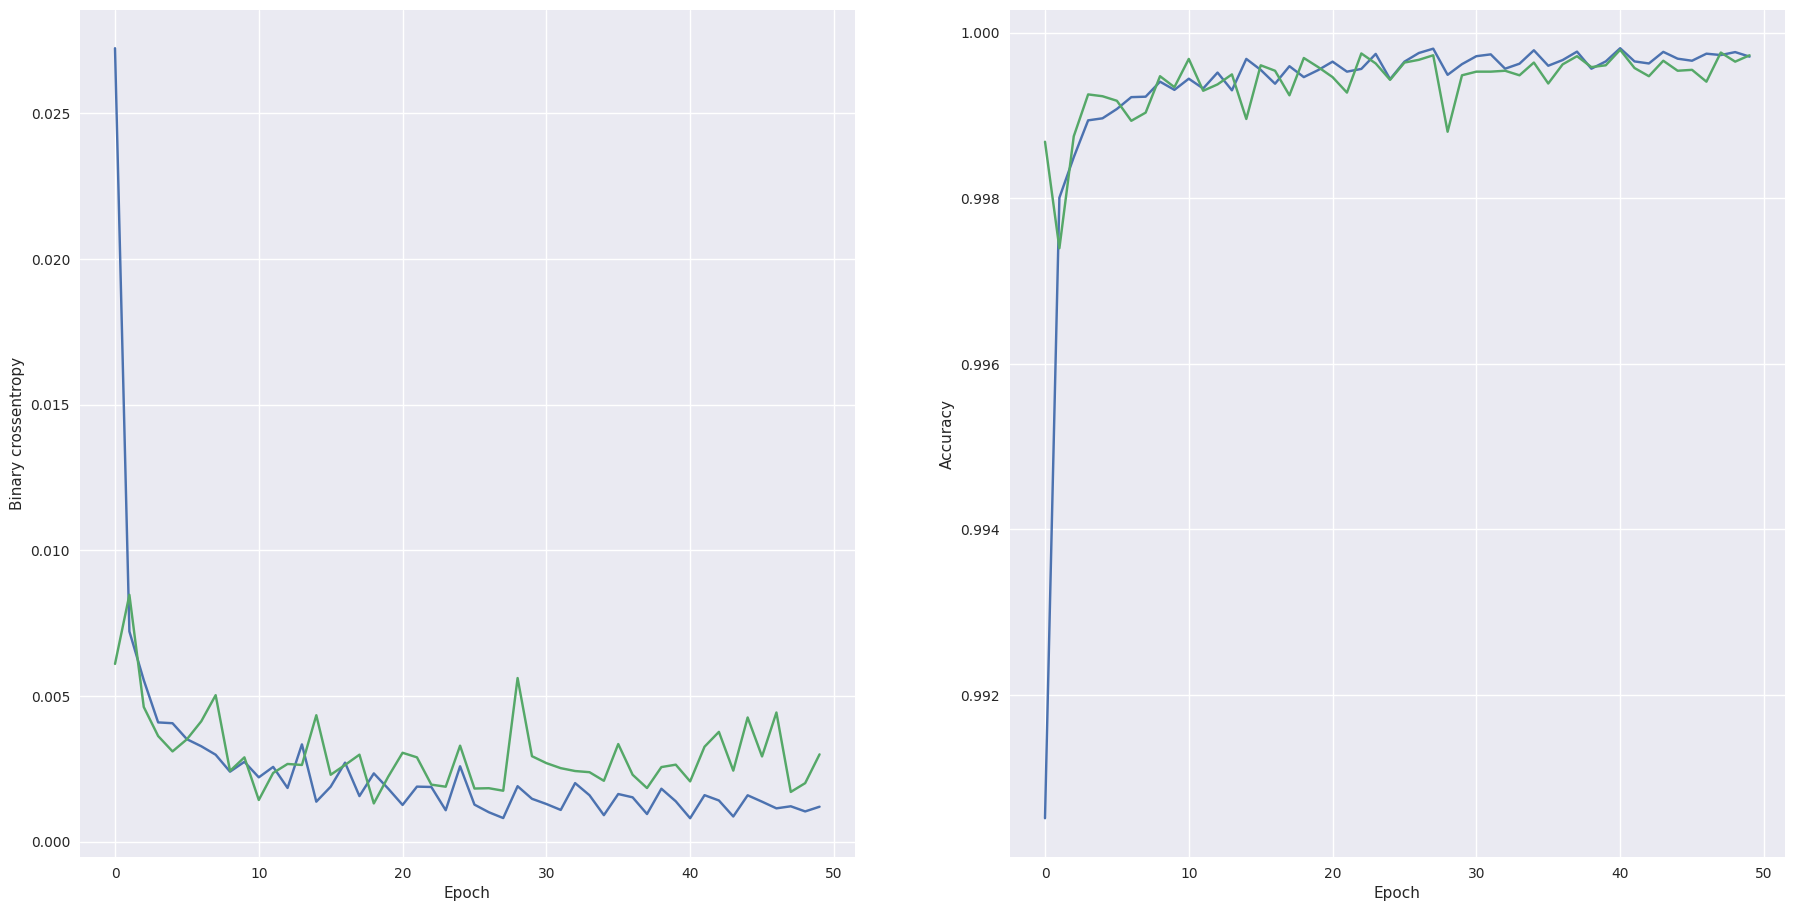

64 nodes, dropout 0, learnig rate 0.001, batch size 300


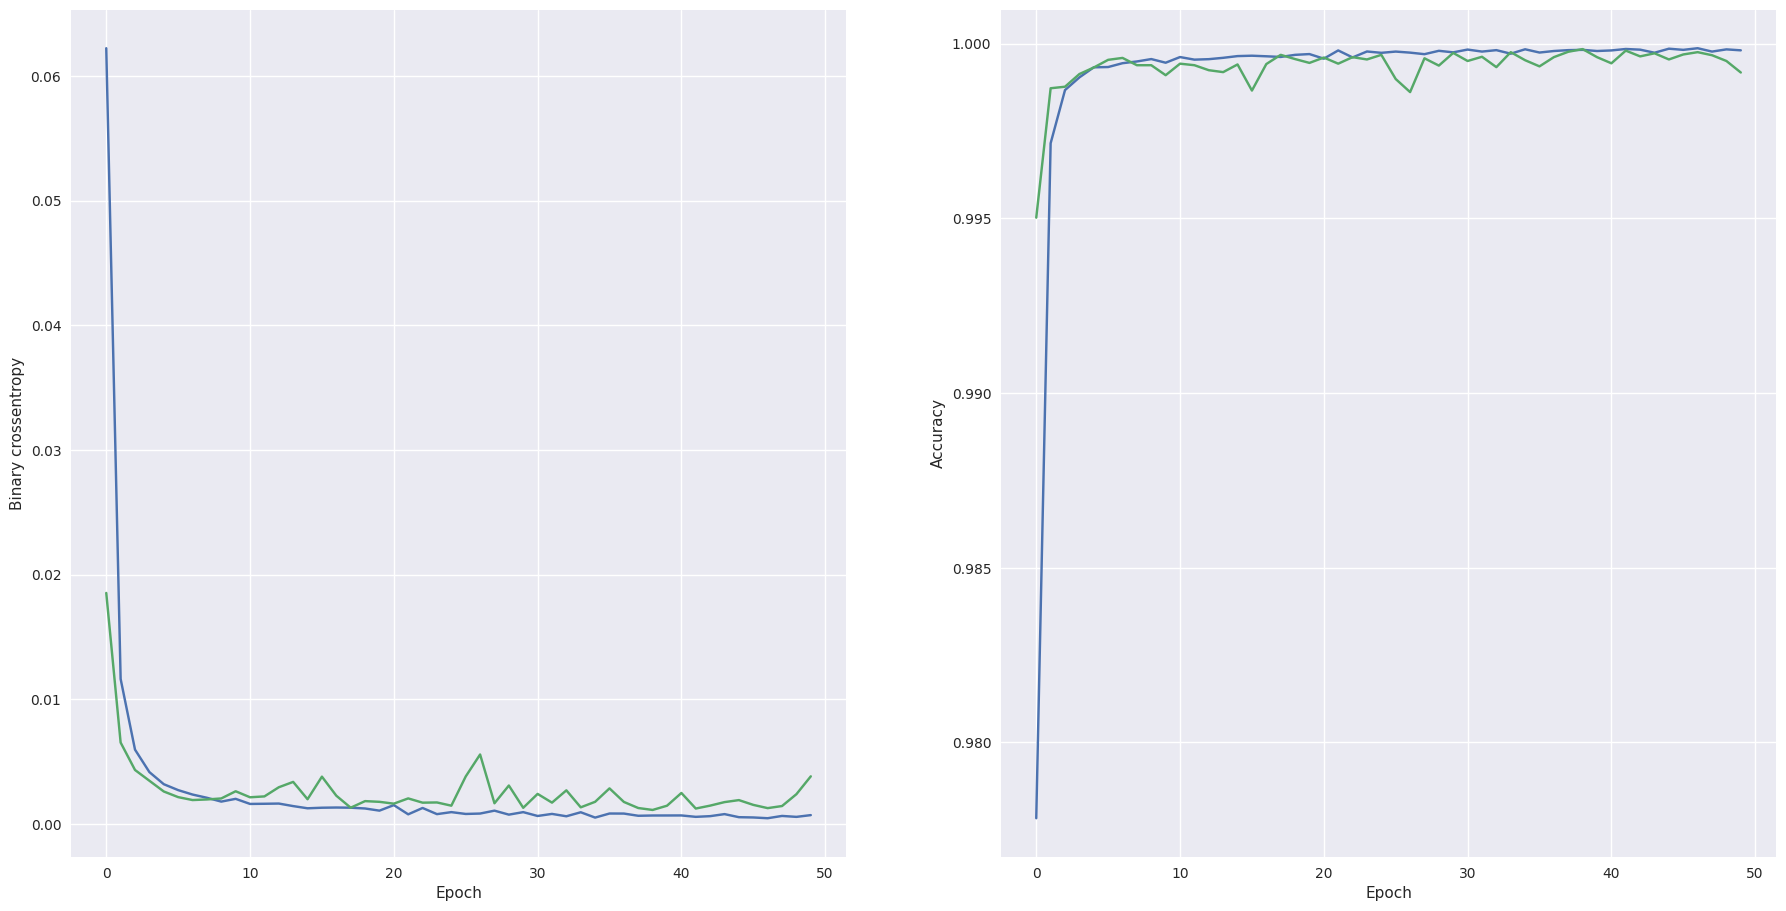

64 nodes, dropout 0, learnig rate 0.001, batch size 500


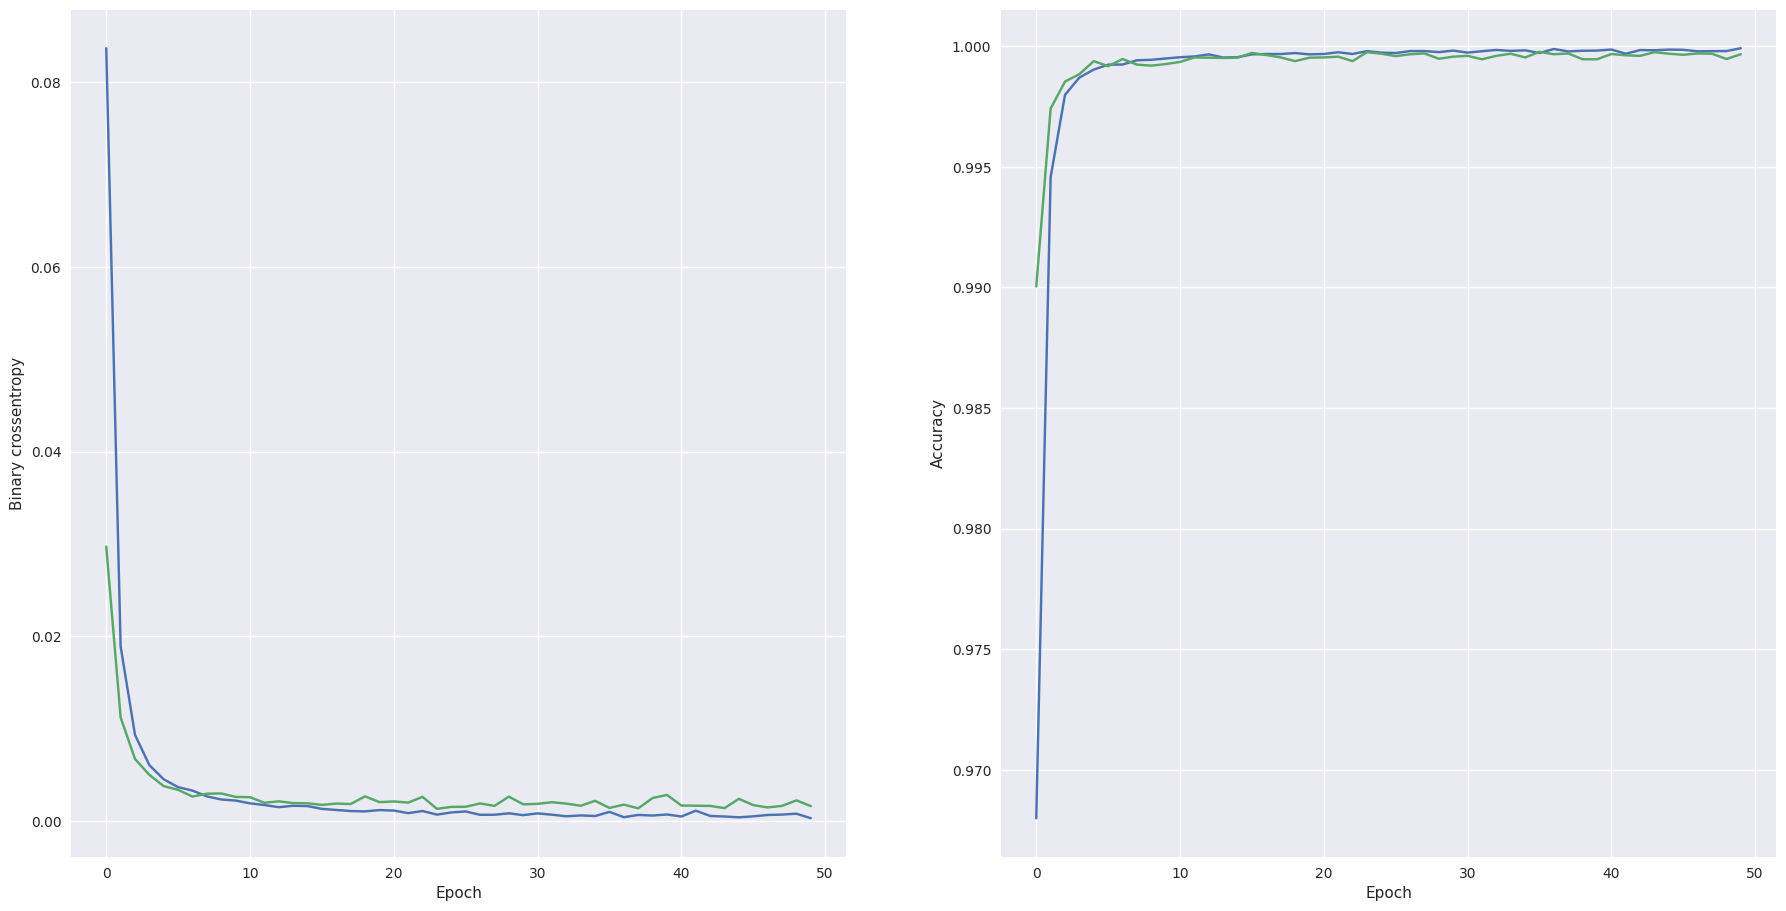

64 nodes, dropout 0.2, learnig rate 0.01, batch size 300


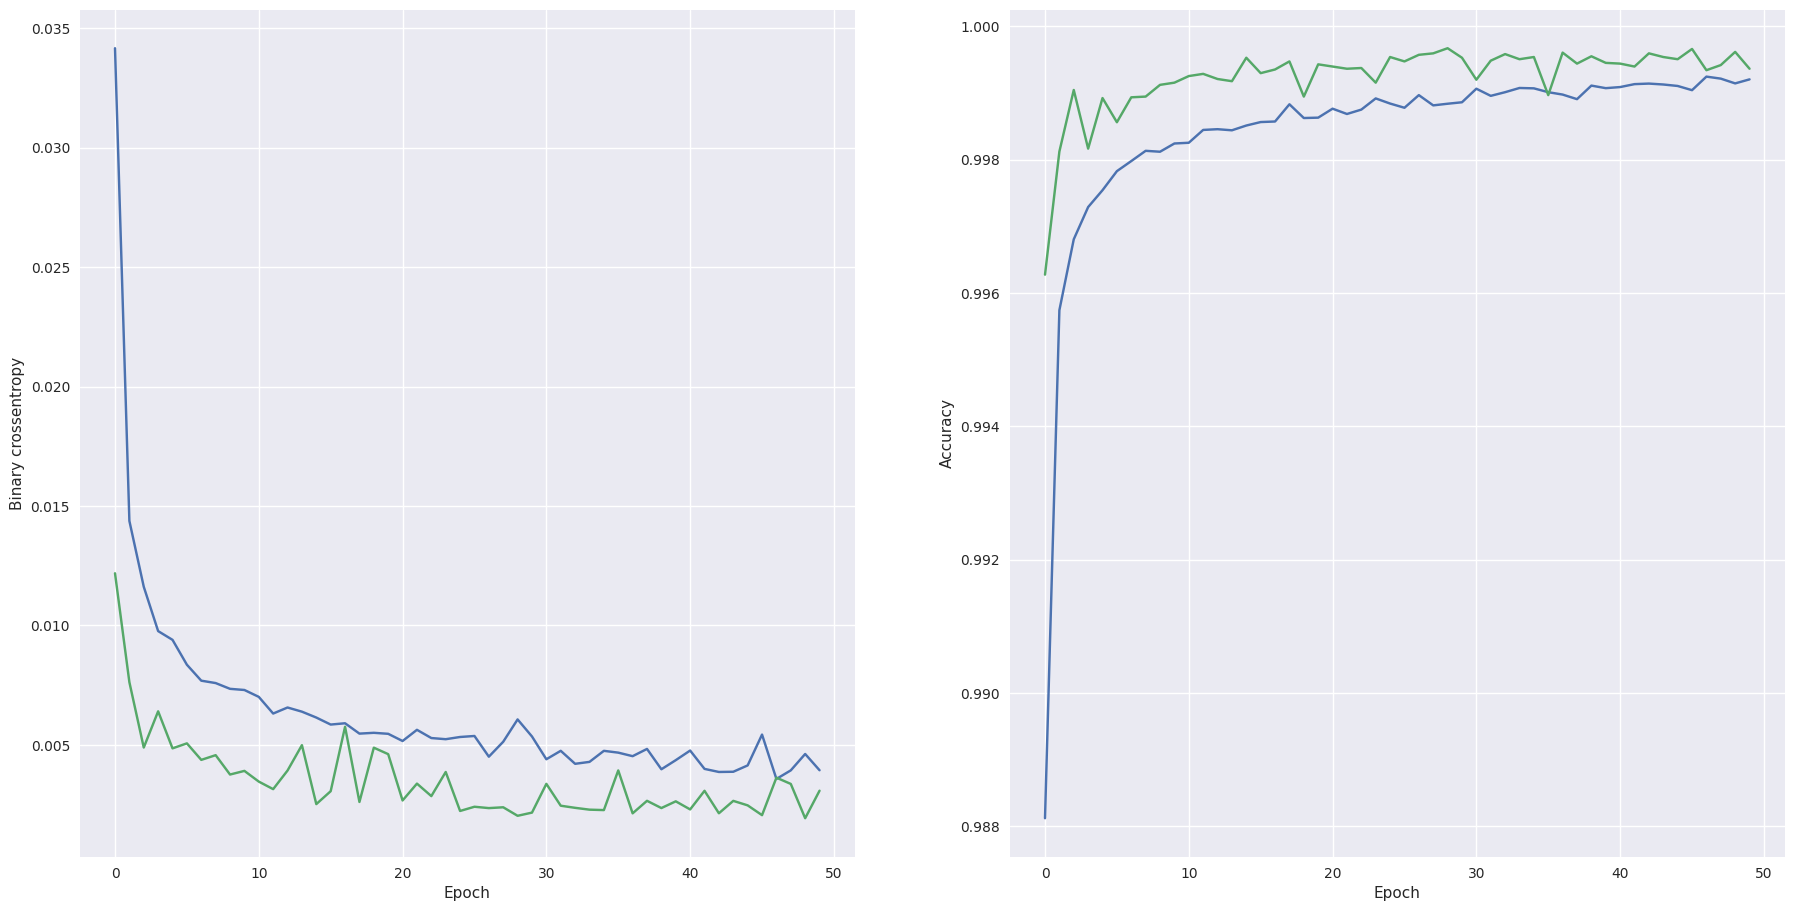

64 nodes, dropout 0.2, learnig rate 0.01, batch size 500


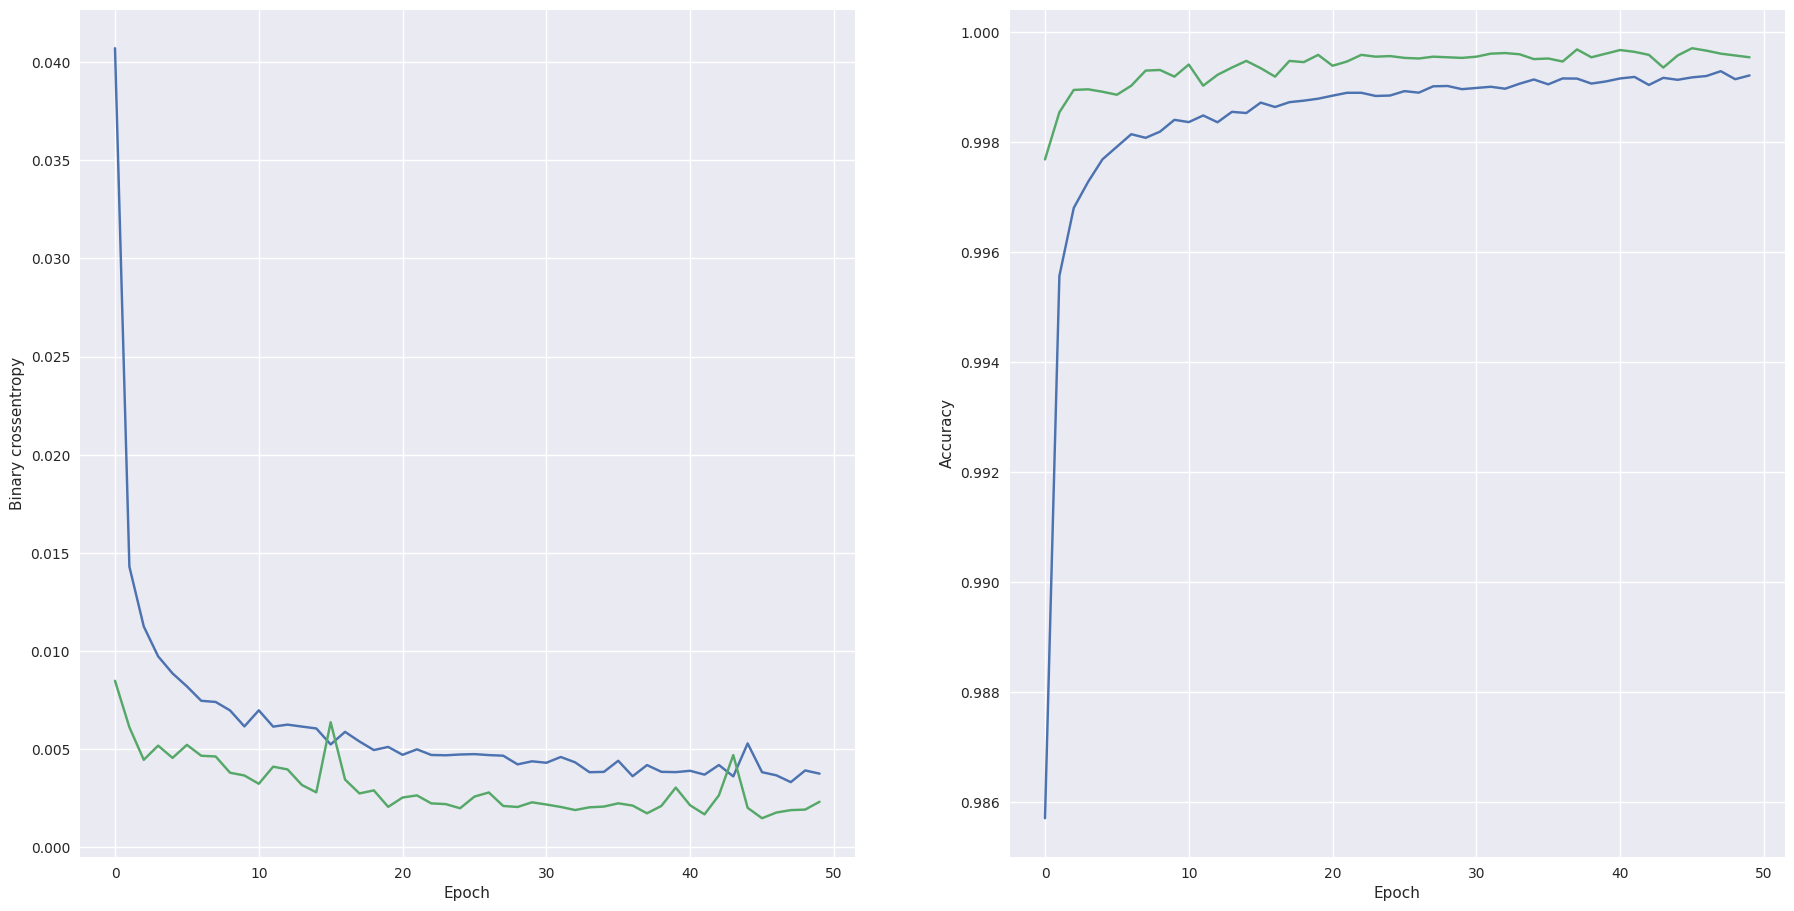

64 nodes, dropout 0.2, learnig rate 0.001, batch size 300


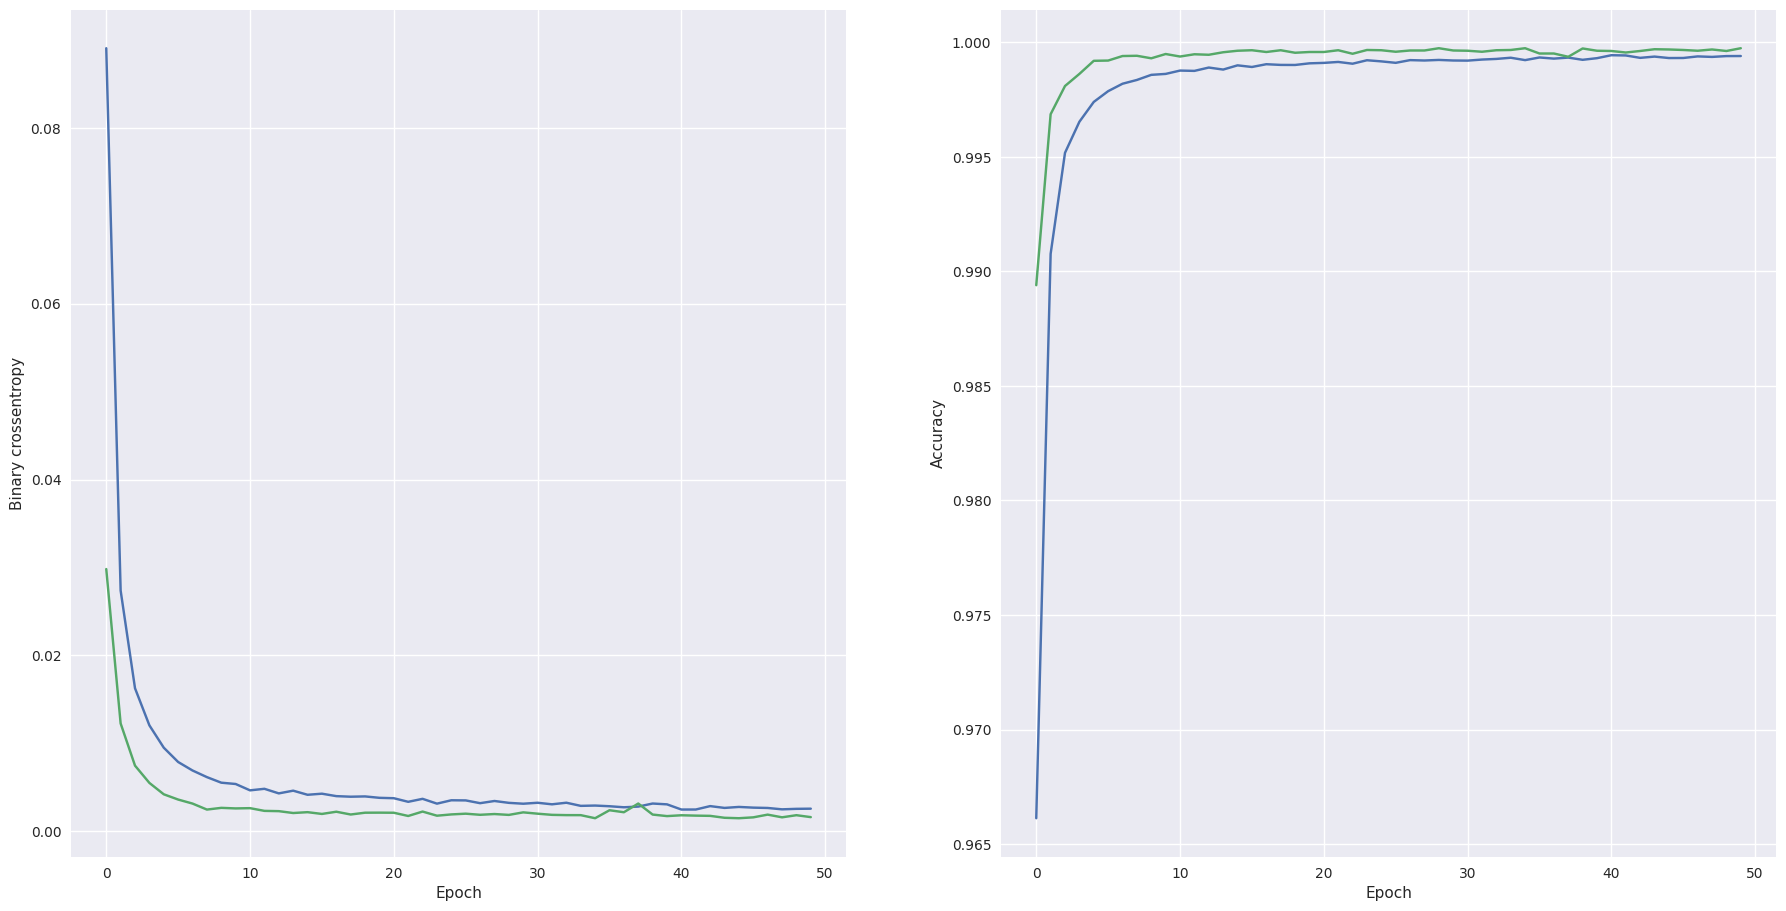

64 nodes, dropout 0.2, learnig rate 0.001, batch size 500


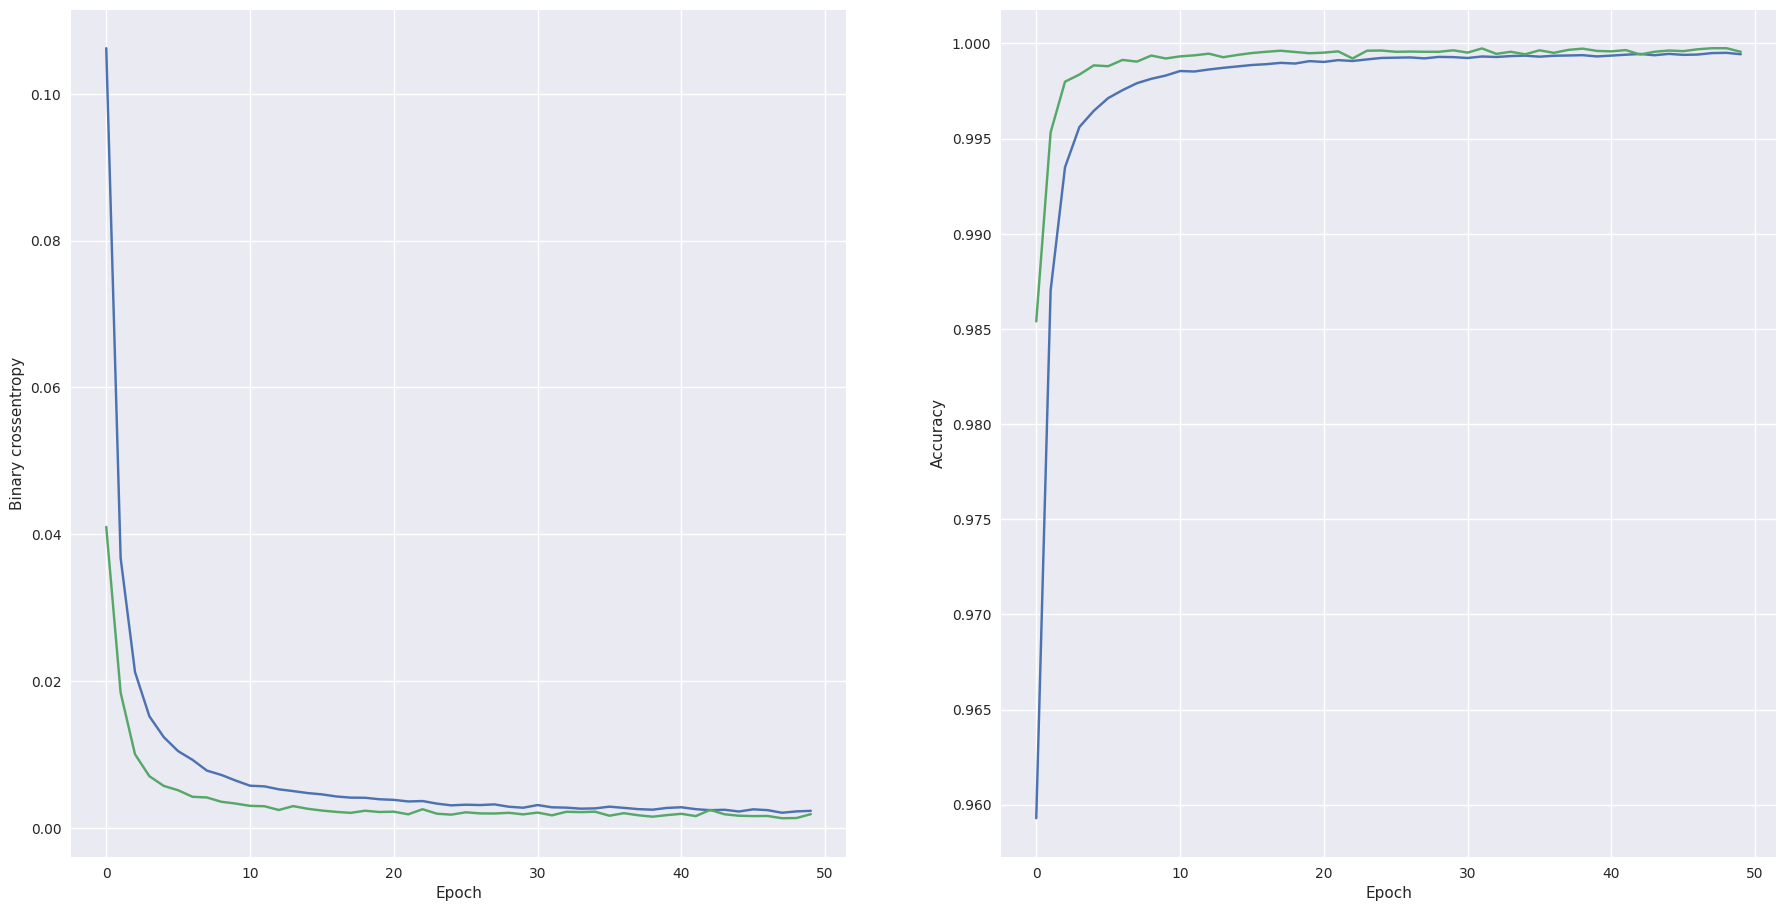

In [39]:
# here I just want to demonstrate how it is done. I don't want to make the computing heavy. Therefore I limit our choices

epochs=50
for num_nodes in [32, 64]:
    for dropout_prob in [0, 0.2]:
        for learning_rate in [0.01, 0.001]:
            for batch_size in [300, 500]:
                print(f'{num_nodes} nodes, dropout {dropout_prob}, learnig rate {learning_rate}, batch size {batch_size}')
                model, history = train_model(x_train, y_train,num_nodes, dropout_prob,
                                                learning_rate, batch_size, epochs)
                plot_history(history)

**Note that:**

This is just a demonstration. Although the results are satisfactory, but we are not limited to these hyperparameters.

**Observation**

As shown above:
* the *more precise learning_rate* (0.001) has a **huge impact** on both 'Accuracy' and 'Binary cross entropy'
* batch_size **500** seems to be a ***better*** choice over batch_size **300**
* it is a good idea to avoid overfitting by setting the dropout point
* the most satisfactory set amoung our choices is: *64 nodes, dropout 0.2, learnig rate 0.001, batch size 500*

# 8. Conclusion

* The dataset is clean and balance
* Therefore the observation shows satisfactory results in both ML and DL models
